In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install tensorflow

In [1]:
from IPython.display import display, clear_output
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train_normalized = x_train/255 
x_test_normalized = x_test/255 

x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [2]:
marvin = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(filters=32, kernel_size=5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
        
marvin.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 1181194 (4.51 MB)
Trainable params: 1181194 (4.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

print(-tf.math.log(1/10))

sampleID = 100
loss_fn(y_train[:1], marvin(x_train[sampleID-1:sampleID]).numpy()).numpy()

marvin.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001),
              loss=loss_fn,
              metrics=['accuracy'])

stopping = tf.keras.callbacks.EarlyStopping(
monitor="val_accuracy",
patience=5,
)

marvin.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[stopping]
)

tf.Tensor(2.3025851, shape=(), dtype=float32)
Epoch 1/100
469/469 [==============================] - 6s 10ms/step - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.0840 - val_accuracy: 0.9761
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0697 - accuracy: 0.9779 - val_loss: 0.0848 - val_accuracy: 0.9761
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0683 - accuracy: 0.9780 - val_loss: 0.0847 - val_accuracy: 0.9759
Epoch 4/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0678 - accuracy: 0.9792 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0669 - accuracy: 0.9788 - val_loss: 0.0816 - val_accuracy: 0.9771
Epoch 6/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0669 - accuracy: 0.9791 - val_loss: 0.0847 - val_accuracy: 0.9771
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0633 - accurac

In [4]:
model_name = 'marvin.h5'
marvin.save(model_name, save_format='h5')
print('Success! You saved Marvin as: ', model_name)

Success! You saved Marvin as:  marvin.h5


C:\Users\tim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 2ms/step


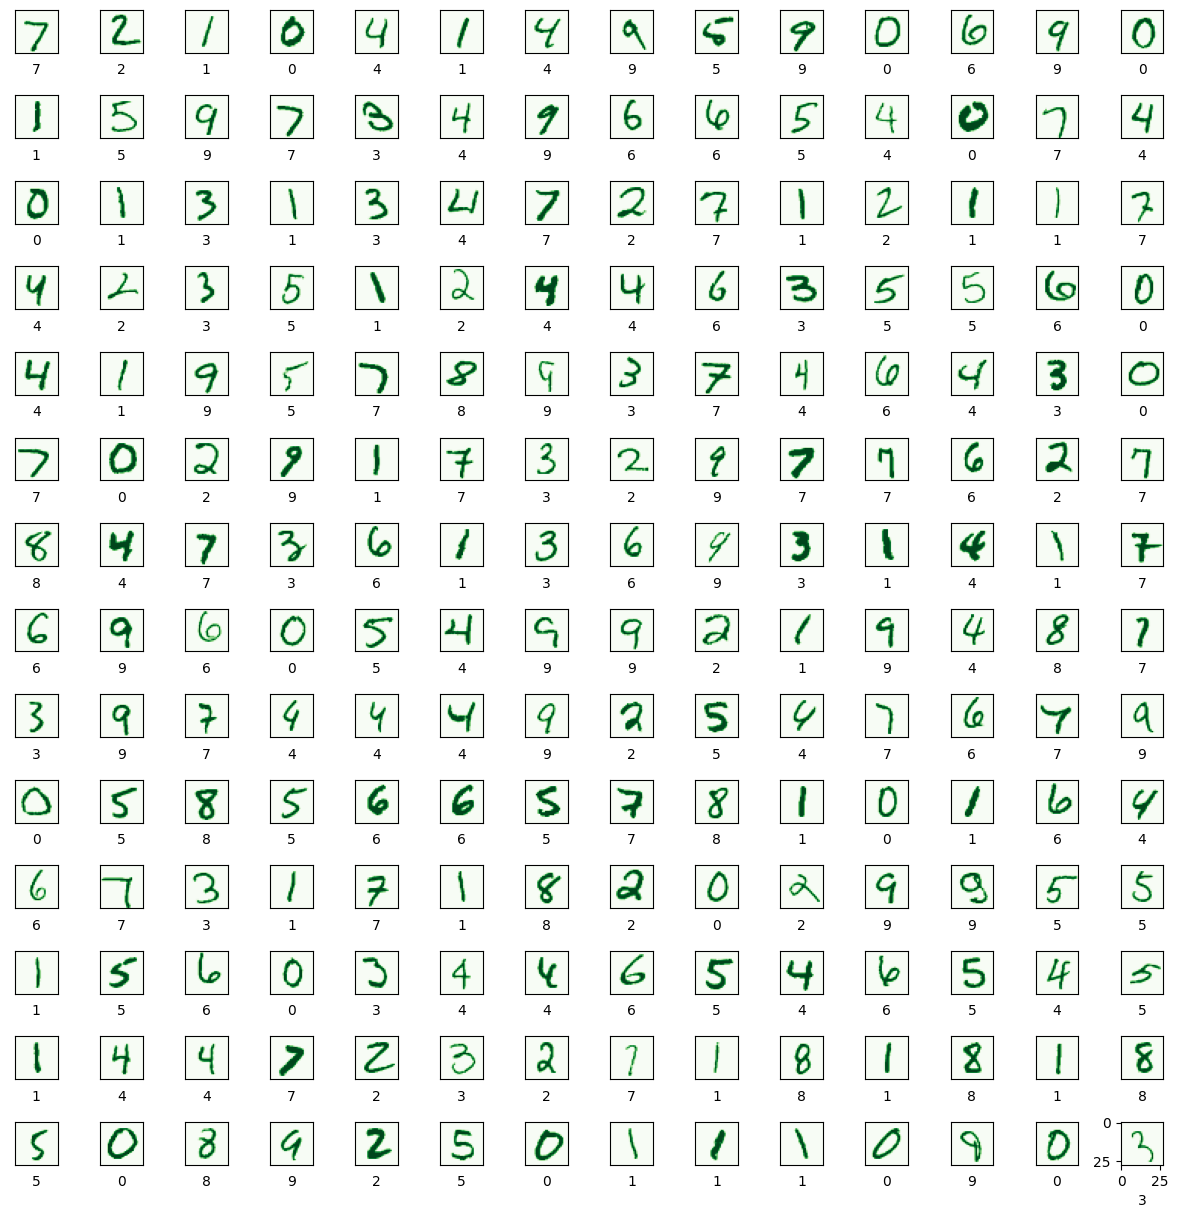

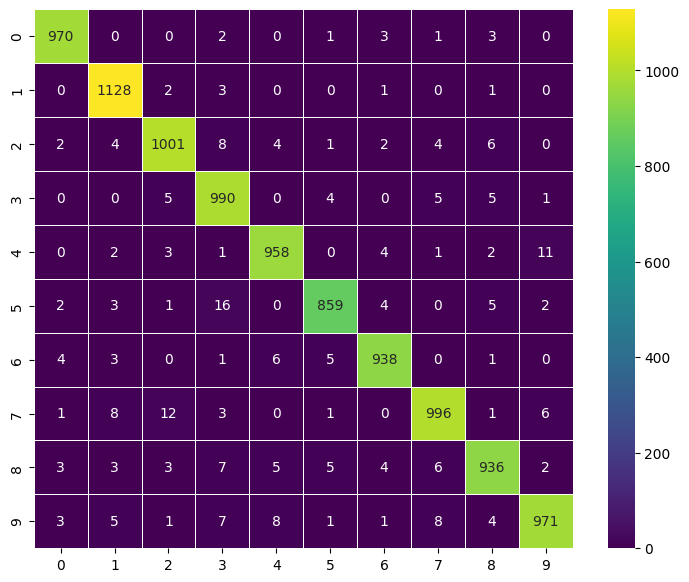

In [5]:
model_name = 'marvin.h5'
marvin_reloaded = tf.keras.models.load_model(model_name)

predictions = marvin_reloaded.predict([x_test])

predictions = np.argmax(predictions, axis=1)
pd.DataFrame(predictions)

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()